In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qu

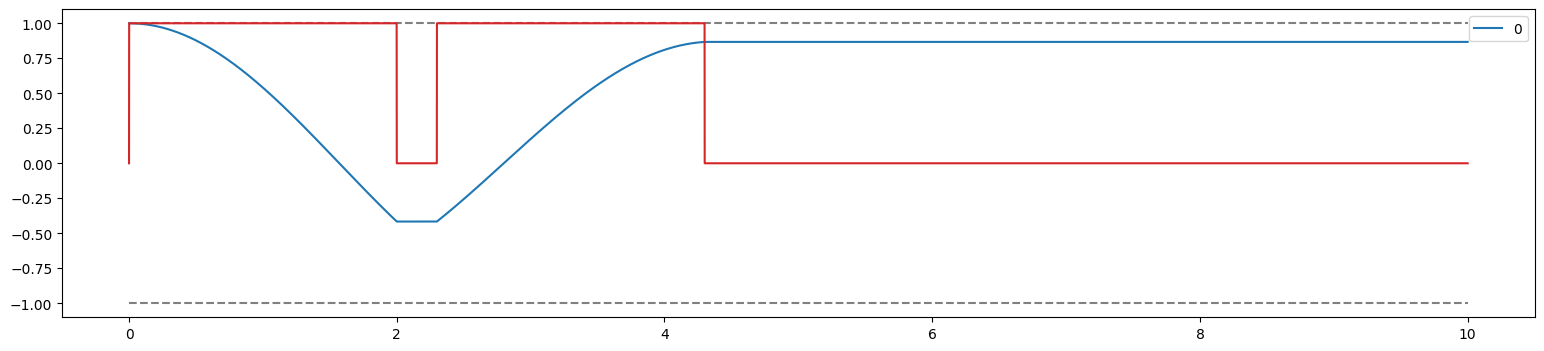

In [2]:
omega = 1
delta = 0
time = 10
eps = 10
tau = 2
delay = 0.3
n_points = 10000

H = qu.Qobj([
    [0, 0],
    [0, -delta]
])

H0 = qu.Qobj([
    [0, omega/2],
    [omega/2, 0]
])

H1 = qu.Qobj([
    [0, omega/2*np.exp(1j*eps)],
    [omega/2*np.exp(-1j*eps), 0]
])

def H_coeff(t, args):
    return 1

def H0_coeff(t, args):
    if 0 < t < tau:
        return 1
    return 0

def H1_coeff(t, args):
    if tau+delay < t < 2*tau + delay:
        return 1
    return 0

psi_0 = qu.basis(2,0)
observables = [qu.Qobj([[1,0],
                  [0,-1]])]
times = np.linspace(0,time, n_points)

res = qu.mesolve([[H, H_coeff], [H0, H0_coeff], [H1, H1_coeff]], psi_0, tlist=times, e_ops=observables)

plt.figure(figsize=[19,4])

for i in range(len(observables)):
    plt.plot(res.times, res.expect[i], label="%d"%i)
plt.legend()
plt.plot([0,time],[1,1], "--", color="gray")
plt.plot([0,time],[-1,-1], "--", color="gray")
plt.plot(times, [np.max([H0_coeff(_t, args=0), H1_coeff(_t, args=0)]) for _t in times], color="tab:red")

#plt.ylim([-0.05,1.05])
#plt.xlim([6,7])
plt.show()